In [ ]:
#This step is done to connect the content directory to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
hr1 = pd.read_csv("/content/drive/MyDrive/Data_mining PA2/hr_1.csv")
hr1.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,subset_group
0,1,0,2,1,1,0,1,1,2,1,0,0,0,60.0,0,1,Subset 1
1,2,0,1,1,0,0,1,48,4,1,0,0,0,94.5,0,1,Subset 1
2,1,0,2,1,1,0,4,35,4,1,0,0,0,140.4,1,0,Subset 1
3,2,0,2,4,1,0,1,2,3,0,0,0,0,85.0,0,0,Subset 1
4,2,0,0,2,1,0,1,99,4,1,0,0,0,114.3,1,0,Subset 1


In [3]:
hr1.shape

(7812, 17)

In [4]:
hr2 = pd.read_csv("/content/drive/MyDrive/Data_mining PA2/hr_2.csv")
hr2.shape

(12534, 17)

In [5]:
hr3 = pd.read_csv("/content/drive/MyDrive/Data_mining PA2/hr_3.csv")
hr3.shape

(15929, 17)

# **Standardize**

hr1

In [6]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# select columns
columns_not_to_scale = ['booking_status', 'required_car_parking_space', 'repeated_guest','subset_group']
columns_to_scale = hr1.columns.difference(columns_not_to_scale)

# scale columns
hr1_scaled = hr1.copy()
hr1_scaled[columns_to_scale] = scaler.fit_transform(hr1[columns_to_scale])


hr1_scaled.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,subset_group
0,-1.546802,-0.252507,1.302261,-0.788903,0.219681,0,-0.503683,-0.938538,-0.842968,0.219900,0,-0.076984,-0.126608,-0.995443,-0.748857,1,Subset 1
1,0.360034,-0.252507,0.172526,-0.788903,-2.014887,0,-0.503683,-0.066676,1.089329,0.219900,0,-0.076984,-0.126608,0.120662,-0.748857,1,Subset 1
2,-1.546802,-0.252507,1.302261,-0.788903,0.219681,0,1.702733,-0.307829,1.089329,0.219900,0,-0.076984,-0.126608,1.605566,0.775392,0,Subset 1
3,0.360034,-0.252507,1.302261,1.310658,0.219681,0,-0.503683,-0.919988,0.123180,-1.341791,0,-0.076984,-0.126608,-0.186671,-0.748857,0,Subset 1
4,0.360034,-0.252507,-0.957209,-0.089049,0.219681,0,-0.503683,0.879387,1.089329,0.219900,0,-0.076984,-0.126608,0.761209,0.775392,0,Subset 1


In [7]:
# prompt: drop the last column

hr1_scaled = hr1_scaled.drop(['subset_group'], axis=1)
hr1_scaled.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,-1.546802,-0.252507,1.302261,-0.788903,0.219681,0,-0.503683,-0.938538,-0.842968,0.219900,0,-0.076984,-0.126608,-0.995443,-0.748857,1
1,0.360034,-0.252507,0.172526,-0.788903,-2.014887,0,-0.503683,-0.066676,1.089329,0.219900,0,-0.076984,-0.126608,0.120662,-0.748857,1
2,-1.546802,-0.252507,1.302261,-0.788903,0.219681,0,1.702733,-0.307829,1.089329,0.219900,0,-0.076984,-0.126608,1.605566,0.775392,0
3,0.360034,-0.252507,1.302261,1.310658,0.219681,0,-0.503683,-0.919988,0.123180,-1.341791,0,-0.076984,-0.126608,-0.186671,-0.748857,0
4,0.360034,-0.252507,-0.957209,-0.089049,0.219681,0,-0.503683,0.879387,1.089329,0.219900,0,-0.076984,-0.126608,0.761209,0.775392,0


In [8]:
hr1_scaled.shape

(7812, 16)

hr2

In [18]:
columns_to_scale = hr2.columns.difference(columns_not_to_scale)

hr2_scaled = hr2.copy()
hr2_scaled[columns_to_scale] = scaler.fit_transform(hr2[columns_to_scale])

hr2_scaled.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,subset_group
0,0.17801,-0.303819,-0.926177,-0.175459,0.047692,0,-0.539036,1.356492,-1.458688,0.321398,0,-0.061613,-0.075946,-0.372123,-0.801364,1,Subset 2
1,2.06724,-0.303819,-0.926177,1.193484,0.047692,0,-0.539036,0.261209,0.326606,-1.326886,0,-0.061613,-0.075946,-0.463306,0.508534,0,Subset 2
2,0.17801,-0.303819,-0.926177,-0.175459,2.046937,0,-0.539036,1.904133,-0.566041,0.321398,0,-0.061613,-0.075946,0.069084,0.508534,1,Subset 2
3,0.17801,-0.303819,0.200772,0.509012,-1.951553,0,-0.539036,-1.199168,1.219253,0.321398,0,-0.061613,-0.075946,-0.489778,0.508534,0,Subset 2
4,0.17801,-0.303819,1.327721,-0.859931,-1.951553,0,-0.539036,0.370737,-1.458688,0.321398,0,-0.061613,-0.075946,-0.533899,0.508534,0,Subset 2


In [20]:
hr2_scaled = hr2_scaled.drop(['subset_group'], axis=1)
hr2_scaled.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0.17801,-0.303819,-0.926177,-0.175459,0.047692,0,-0.539036,1.356492,-1.458688,0.321398,0,-0.061613,-0.075946,-0.372123,-0.801364,1
1,2.06724,-0.303819,-0.926177,1.193484,0.047692,0,-0.539036,0.261209,0.326606,-1.326886,0,-0.061613,-0.075946,-0.463306,0.508534,0
2,0.17801,-0.303819,-0.926177,-0.175459,2.046937,0,-0.539036,1.904133,-0.566041,0.321398,0,-0.061613,-0.075946,0.069084,0.508534,1
3,0.17801,-0.303819,0.200772,0.509012,-1.951553,0,-0.539036,-1.199168,1.219253,0.321398,0,-0.061613,-0.075946,-0.489778,0.508534,0
4,0.17801,-0.303819,1.327721,-0.859931,-1.951553,0,-0.539036,0.370737,-1.458688,0.321398,0,-0.061613,-0.075946,-0.533899,0.508534,0


In [21]:
hr2_scaled.shape

(12534, 16)

hr3

In [10]:
columns_to_scale = hr3.columns.difference(columns_not_to_scale)

hr3_scaled = hr3.copy()
hr3_scaled[columns_to_scale] = scaler.fit_transform(hr3[columns_to_scale])

hr3_scaled.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,subset_group
0,0.370486,-0.229186,0.254352,-0.147991,0.098275,0,-0.481972,1.382087,-0.257278,-1.146367,0,-0.089107,-0.079335,-1.044816,-0.808896,0,Subset 3
1,0.370486,-0.229186,1.432133,0.587762,-1.994536,0,-0.481972,-0.884723,0.671805,0.328036,0,-0.089107,-0.079335,0.120563,0.365448,0,Subset 3
2,0.370486,-0.229186,-0.923430,-0.147991,2.191086,0,-0.481972,2.644876,-1.186362,0.328036,0,-0.089107,-0.079335,0.353192,0.365448,1,Subset 3
3,0.370486,-0.229186,0.254352,0.587762,0.098275,0,-0.481972,-0.584552,-0.257278,0.328036,0,-0.089107,-0.079335,0.144889,0.365448,0,Subset 3
4,0.370486,-0.229186,0.254352,0.587762,0.098275,0,1.723312,-0.077366,1.600888,0.328036,0,-0.089107,-0.079335,0.090646,0.365448,0,Subset 3


In [22]:
hr3_scaled = hr3_scaled.drop(['subset_group'], axis=1)
hr3_scaled.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0.370486,-0.229186,0.254352,-0.147991,0.098275,0,-0.481972,1.382087,-0.257278,-1.146367,0,-0.089107,-0.079335,-1.044816,-0.808896,0
1,0.370486,-0.229186,1.432133,0.587762,-1.994536,0,-0.481972,-0.884723,0.671805,0.328036,0,-0.089107,-0.079335,0.120563,0.365448,0
2,0.370486,-0.229186,-0.923430,-0.147991,2.191086,0,-0.481972,2.644876,-1.186362,0.328036,0,-0.089107,-0.079335,0.353192,0.365448,1
3,0.370486,-0.229186,0.254352,0.587762,0.098275,0,-0.481972,-0.584552,-0.257278,0.328036,0,-0.089107,-0.079335,0.144889,0.365448,0
4,0.370486,-0.229186,0.254352,0.587762,0.098275,0,1.723312,-0.077366,1.600888,0.328036,0,-0.089107,-0.079335,0.090646,0.365448,0


In [23]:
hr3_scaled.shape

(15929, 16)

# **split**

hr1

In [11]:
from sklearn.model_selection import train_test_split


train, validation = train_test_split(hr1_scaled, test_size=0.1, random_state=42)
#For each binary classification problem, set aside 10% of relevant samples for final validation of the models.
print(train.shape, validation.shape)


(7030, 16) (782, 16)


hr2

In [24]:
hr2_train, hr2_validation = train_test_split(hr2_scaled, test_size=0.1, random_state=42)
#For each binary classification problem, set aside 10% of relevant samples for final validation of the models.
print(hr2_train.shape, hr2_validation.shape)

(11280, 16) (1254, 16)


hr3

In [25]:
hr3_train, hr3_validation = train_test_split(hr3_scaled, test_size=0.1, random_state=42)
#For each binary classification problem, set aside 10% of relevant samples for final validation of the models.
print(hr3_train.shape, hr3_validation.shape)

(14336, 16) (1593, 16)


# ***ANN***

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l2
from tensorflow.keras.optimizers import SGD, Adam, RMSprop

In [44]:
model=Sequential()
model.add(Dense(256,input_shape=(hr1_scaled.shape[1]-1,), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1,activation="sigmoid"))


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(hr3_train.drop("booking_status",axis=1),hr3_train["booking_status"],
                    validation_data=(hr3_validation.drop("booking_status",axis=1),
                                     hr3_validation["booking_status"]),
          batch_size=64, epochs=20)

Epoch 1/20
224/224 [==============================] - 4s 5ms/step - loss: 0.3827 - accuracy: 0.8263 - val_loss: 0.3254 - val_accuracy: 0.8475
Epoch 2/20
224/224 [==============================] - 1s 4ms/step - loss: 0.3215 - accuracy: 0.8560 - val_loss: 0.3080 - val_accuracy: 0.8726
Epoch 3/20
224/224 [==============================] - 1s 4ms/step - loss: 0.2989 - accuracy: 0.8637 - val_loss: 0.2969 - val_accuracy: 0.8694
Epoch 4/20
224/224 [==============================] - 1s 4ms/step - loss: 0.2857 - accuracy: 0.8729 - val_loss: 0.2891 - val_accuracy: 0.8826
Epoch 5/20
224/224 [==============================] - 2s 7ms/step - loss: 0.2743 - accuracy: 0.8781 - val_loss: 0.2854 - val_accuracy: 0.8770
Epoch 6/20
224/224 [==============================] - 2s 7ms/step - loss: 0.2671 - accuracy: 0.8805 - val_loss: 0.2762 - val_accuracy: 0.8770
Epoch 7/20
224/224 [==============================] - 1s 7ms/step - loss: 0.2596 - accuracy: 0.8853 - val_loss: 0.2818 - val_accuracy: 0.8763
Epoch 

In [45]:
loss, accuracy = model.evaluate(hr3_validation.drop("booking_status",axis=1), hr3_validation["booking_status"])
print("Loss:", loss)
print("Accuracy:", accuracy)


50/50 [==============================] - 0s 4ms/step - loss: 0.2643 - accuracy: 0.8908
Loss: 0.2642883062362671
Accuracy: 0.8907721042633057


<function matplotlib.pyplot.imshow(X, cmap=None, norm=None, *, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, interpolation_stage=None, filternorm=True, filterrad=4.0, resample=None, url=None, data=None, **kwargs)>

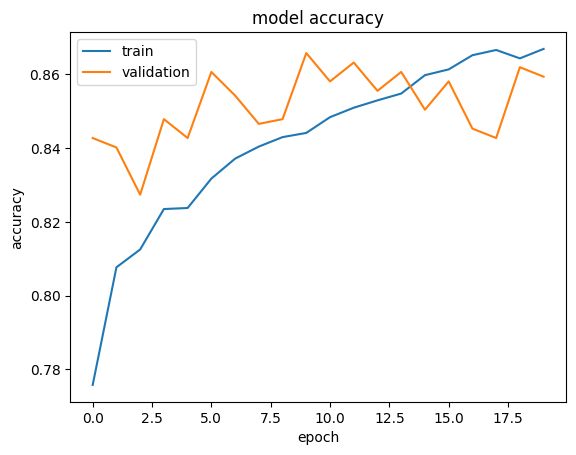

In [38]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "validation"], loc="upper left")
plt.imshow

In [ ]:
!pip uninstall tensorflow
!pip install tensorflow==2.12.0

Found existing installation: tensorflow 2.12.0
Uninstalling tensorflow-2.12.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.10/dist-packages/tensorflow-2.12.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/tensorflow/*
Proceed (Y/n)? y
  Successfully uninstalled tensorflow-2.12.0
  Using cached tensorflow-2.12.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (585.9 MB)


In [ ]:
#pip install --upgrade tensorflow


**cross-fold validation**

hr1

In [15]:
import tensorflow as tf
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

# Define a function to create the model (needed for KerasClassifier)
def create_model():
    model = Sequential()
    model.add(Dense(256,input_shape=(hr1_scaled.shape[1]-1,), activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1,activation="sigmoid"))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Wrap the model with KerasClassifier
model = KerasClassifier(build_fn=create_model, epochs=20, verbose=0)

# Define the cross-validation fold and the batch sizes
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
batch_sizes = [16, 32, 64, 128, 256]

X = train.drop("booking_status", axis=1)
y = train["booking_status"]

# Conduct the cross-validation and store the results
results = {}
for batch_size in batch_sizes:
    model.set_params(batch_size=batch_size)
    cv_scores = cross_val_score(model, X, y, cv=kfold)
    results[batch_size] = np.mean(cv_scores)

# Print the cross-validation scores for each batch size
for batch_size, score in results.items():
    print(f"Batch Size {batch_size}: Mean Accuracy = {score:.4f}")


Batch Size 16: Mean Accuracy = 0.8371
Batch Size 32: Mean Accuracy = 0.8438
Batch Size 64: Mean Accuracy = 0.8393
Batch Size 128: Mean Accuracy = 0.8368
Batch Size 256: Mean Accuracy = 0.8349


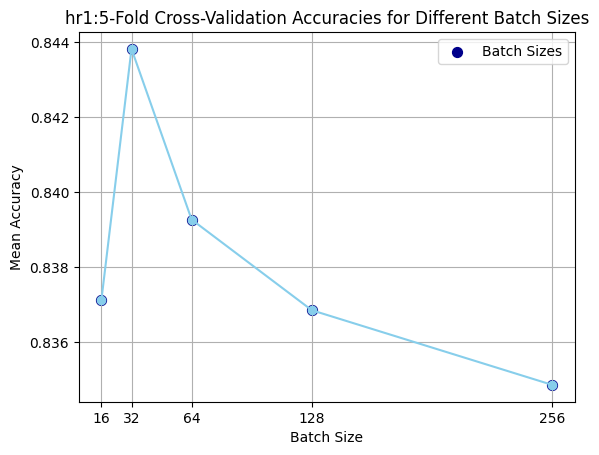

In [16]:
plt.plot(list(results.keys()), list(results.values()), marker='o', linestyle='-', color='skyblue')


# Add title and labels to the plot
plt.title('hr1:5-Fold Cross-Validation Accuracies for Different Batch Sizes')
plt.xlabel('Batch Size')
plt.ylabel('Mean Accuracy')

# Highlight the markers with a larger size and a different color if desired
plt.scatter(results.keys(), results.values(), color='darkblue', s=50, label='Batch Sizes')

# Optionally, you can set the x-ticks to clearly represent each batch size
plt.xticks(list(results.keys()))


plt.legend()
# Show grid lines for better readability
plt.grid(True)


plt.show()


hr2

In [26]:
X = hr2_train.drop("booking_status", axis=1)
y = hr2_train["booking_status"]

# Conduct the cross-validation and store the results
results = {}
for batch_size in batch_sizes:
    model.set_params(batch_size=batch_size)
    cv_scores = cross_val_score(model, X, y, cv=kfold)
    results[batch_size] = np.mean(cv_scores)

# Print the cross-validation scores for each batch size
for batch_size, score in results.items():
    print(f"Batch Size {batch_size}: Mean Accuracy = {score:.4f}")

Batch Size 16: Mean Accuracy = 0.8636
Batch Size 32: Mean Accuracy = 0.8610
Batch Size 64: Mean Accuracy = 0.8594
Batch Size 128: Mean Accuracy = 0.8594
Batch Size 256: Mean Accuracy = 0.8607


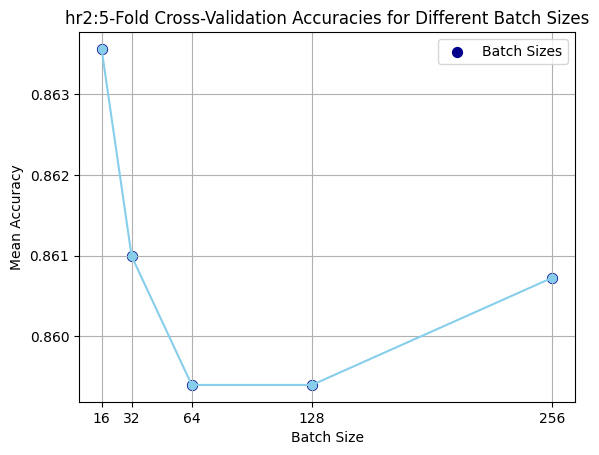

In [27]:
plt.plot(list(results.keys()), list(results.values()), marker='o', linestyle='-', color='skyblue')

# Add title and labels to the plot
plt.title('hr2:5-Fold Cross-Validation Accuracies for Different Batch Sizes')
plt.xlabel('Batch Size')
plt.ylabel('Mean Accuracy')

# Highlight the markers with a larger size and a different color if desired
plt.scatter(results.keys(), results.values(), color='darkblue', s=50, label='Batch Sizes')

plt.xticks(list(results.keys()))
plt.legend()

# Show grid lines for better readability
plt.grid(True)
plt.show()

hr3

In [28]:
X = hr3_train.drop("booking_status", axis=1)
y = hr3_train["booking_status"]

# Conduct the cross-validation and store the results
results = {}
for batch_size in batch_sizes:
    model.set_params(batch_size=batch_size)
    cv_scores = cross_val_score(model, X, y, cv=kfold)
    results[batch_size] = np.mean(cv_scores)

# Print the cross-validation scores for each batch size
for batch_size, score in results.items():
    print(f"Batch Size {batch_size}: Mean Accuracy = {score:.4f}")

Batch Size 16: Mean Accuracy = 0.8934
Batch Size 32: Mean Accuracy = 0.8936
Batch Size 64: Mean Accuracy = 0.8955
Batch Size 128: Mean Accuracy = 0.8916
Batch Size 256: Mean Accuracy = 0.8849


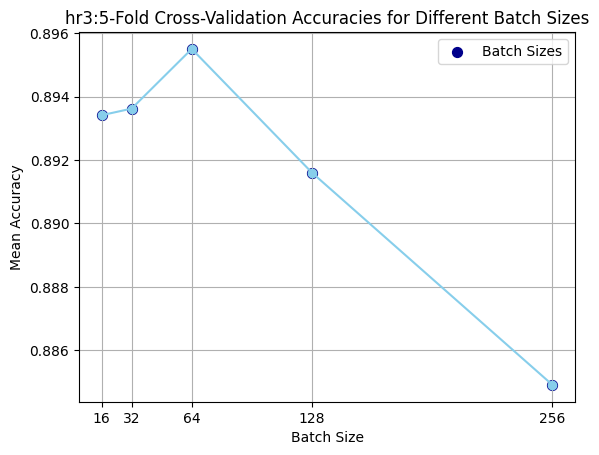

In [29]:
plt.plot(list(results.keys()), list(results.values()), marker='o', linestyle='-', color='skyblue')

# Add title and labels to the plot
plt.title('hr3:5-Fold Cross-Validation Accuracies for Different Batch Sizes')
plt.xlabel('Batch Size')
plt.ylabel('Mean Accuracy')

# Highlight the markers with a larger size and a different color if desired
plt.scatter(results.keys(), results.values(), color='darkblue', s=50, label='Batch Sizes')

plt.xticks(list(results.keys()))
plt.legend()

# Show grid lines for better readability
plt.grid(True)
plt.show()

# ***Random Forests***

In [51]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Define the model
rf_model = RandomForestClassifier(n_estimators=150,
                                  #max_depth=10,
                                  #min_samples_split=2,
                                  #min_samples_leaf=1,
                                  random_state=42)

# Fit the model on the training data
rf_model.fit(hr3_train.drop("booking_status",axis=1),hr3_train["booking_status"])

# Make predictions on the test data
predictions = rf_model.predict(hr3_validation.drop("booking_status",axis=1))

# Calculate the accuracy comparing the predictions to the true labels
accuracy = accuracy_score(hr3_validation["booking_status"], predictions)

# Print the accuracy
print(f"Accuracy of the Random Forest model: {accuracy:.4f}")


Accuracy of the Random Forest model: 0.9052


hr1

In [31]:
# Define your cross-validation strategy
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Values to test for n_estimators
n_estimators_values = [10, 50, 100, 150, 200]

X = train.drop("booking_status", axis=1)
y = train["booking_status"]


# Initialize dictionary to store mean cross-validation scores
cv_scores_dict = {}

# Perform cross-validation for each value of n_estimators
for n_estimators in n_estimators_values:
    rf_model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)

    # Obtain cross-validation scores for the current number of trees
    cv_scores = cross_val_score(rf_model, X, y, cv=kfold, scoring='accuracy')

    # Store the mean of the scores
    cv_scores_dict[n_estimators] = np.mean(cv_scores)

# Print out the mean cross-validation scores for each n_estimators value
for n_estimators, cv_score in cv_scores_dict.items():
    print(f"n_estimators: {n_estimators}, Mean CV Accuracy: {cv_score:.4f}")

n_estimators: 10, Mean CV Accuracy: 0.8596
n_estimators: 50, Mean CV Accuracy: 0.8657
n_estimators: 100, Mean CV Accuracy: 0.8653
n_estimators: 150, Mean CV Accuracy: 0.8644
n_estimators: 200, Mean CV Accuracy: 0.8657


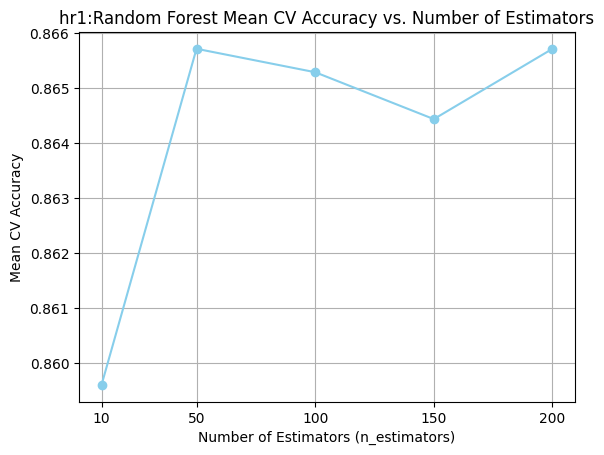

In [32]:
# Plotting with a line and markers at each data point
#plt.figure(figsize=(10, 5))
plt.plot(list(cv_scores_dict.keys()), list(cv_scores_dict.values()), marker='o', linestyle='-', color='skyblue')

# Adding plot details
plt.title('hr1:Random Forest Mean CV Accuracy vs. Number of Estimators')
plt.xlabel('Number of Estimators (n_estimators)')
plt.ylabel('Mean CV Accuracy')
plt.xticks(list(cv_scores_dict.keys()))
plt.grid(True)

# Show the plot
plt.show()

hr2

In [33]:
X = hr2_train.drop("booking_status", axis=1)
y = hr2_train["booking_status"]


# Initialize dictionary to store mean cross-validation scores
cv_scores_dict = {}

# Perform cross-validation for each value of n_estimators
for n_estimators in n_estimators_values:
    rf_model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)

    # Obtain cross-validation scores for the current number of trees
    cv_scores = cross_val_score(rf_model, X, y, cv=kfold, scoring='accuracy')

    # Store the mean of the scores
    cv_scores_dict[n_estimators] = np.mean(cv_scores)

# Print out the mean cross-validation scores for each n_estimators value
for n_estimators, cv_score in cv_scores_dict.items():
    print(f"n_estimators: {n_estimators}, Mean CV Accuracy: {cv_score:.4f}")

n_estimators: 10, Mean CV Accuracy: 0.8812
n_estimators: 50, Mean CV Accuracy: 0.8874
n_estimators: 100, Mean CV Accuracy: 0.8875
n_estimators: 150, Mean CV Accuracy: 0.8886
n_estimators: 200, Mean CV Accuracy: 0.8887


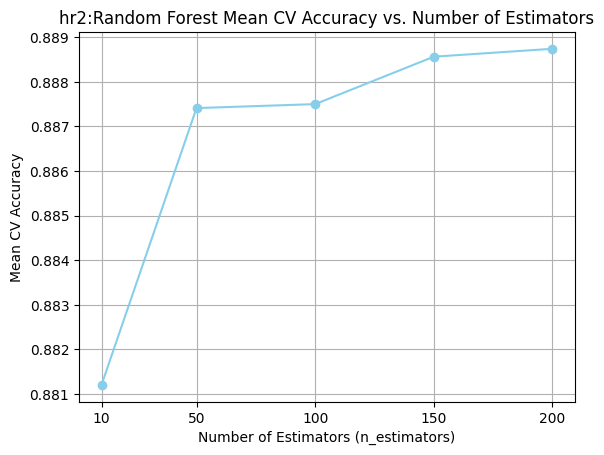

In [34]:
plt.plot(list(cv_scores_dict.keys()), list(cv_scores_dict.values()), marker='o', linestyle='-', color='skyblue')

# Adding plot details
plt.title('hr2:Random Forest Mean CV Accuracy vs. Number of Estimators')
plt.xlabel('Number of Estimators (n_estimators)')
plt.ylabel('Mean CV Accuracy')
plt.xticks(list(cv_scores_dict.keys()))
plt.grid(True)

# Show the plot
plt.show()

hr3

In [35]:
X = hr3_train.drop("booking_status", axis=1)
y = hr3_train["booking_status"]


# Initialize dictionary to store mean cross-validation scores
cv_scores_dict = {}

# Perform cross-validation for each value of n_estimators
for n_estimators in n_estimators_values:
    rf_model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)

    # Obtain cross-validation scores for the current number of trees
    cv_scores = cross_val_score(rf_model, X, y, cv=kfold, scoring='accuracy')

    # Store the mean of the scores
    cv_scores_dict[n_estimators] = np.mean(cv_scores)

# Print out the mean cross-validation scores for each n_estimators value
for n_estimators, cv_score in cv_scores_dict.items():
    print(f"n_estimators: {n_estimators}, Mean CV Accuracy: {cv_score:.4f}")

n_estimators: 10, Mean CV Accuracy: 0.9108
n_estimators: 50, Mean CV Accuracy: 0.9132
n_estimators: 100, Mean CV Accuracy: 0.9150
n_estimators: 150, Mean CV Accuracy: 0.9158
n_estimators: 200, Mean CV Accuracy: 0.9153


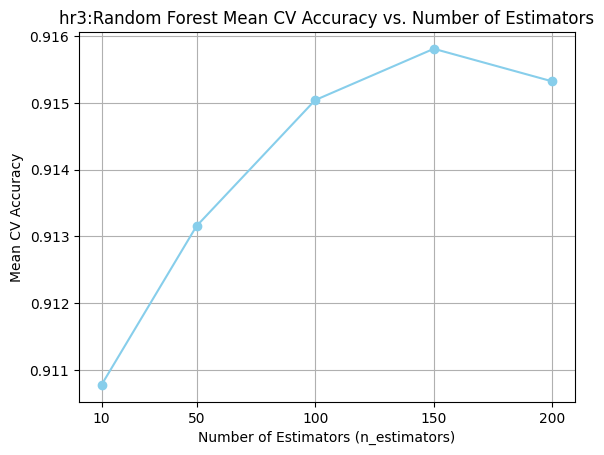

In [36]:
plt.plot(list(cv_scores_dict.keys()), list(cv_scores_dict.values()), marker='o', linestyle='-', color='skyblue')

# Adding plot details
plt.title('hr3:Random Forest Mean CV Accuracy vs. Number of Estimators')
plt.xlabel('Number of Estimators (n_estimators)')
plt.ylabel('Mean CV Accuracy')
plt.xticks(list(cv_scores_dict.keys()))
plt.grid(True)

# Show the plot
plt.show()

In [ ]:
'''
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_test, predictions)

# Print the confusion matrix
print(conf_matrix)

# Alternatively, you can use seaborn to create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Booked', 'Booked'],
            yticklabels=['Not Booked', 'Booked'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()
'''